Before we get to the actual task you will have to run the following code cells. These get the colaboratory backend set up properly.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import matthews_corrcoef

np.random.seed(1337)

# Nearest Neighbours Task

For this task, you will be classifying images of hand drawn digits.

### Load Data

First we will load the dataset and take a look at it. After running the following code you will have a dataframe `digit_data_df` that contains the images and `digit_labels` that contains the labels (what digit the image is of). A description of the dataset will be printed that you can read:

In [2]:

digits = datasets.load_digits()
digit_data_df = pd.DataFrame(digits["data"])
digit_labels = pd.Series(digits["target"])
print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### See the data

Run the following code to take a look at some examples of the digits. These images have very low resolution so they are quite blurry.

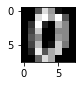

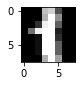

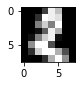

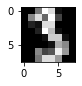

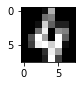

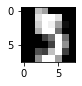

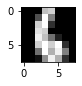

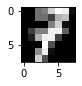

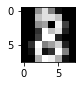

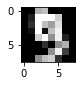

In [3]:
for i in range(10):
    plt.figure(figsize=(1,1))
    plt.gray()
    plt.imshow(digits["images"][i])
    plt.show()

### What you need to know

I'll explain a bit what you need to be equipped with to tackle this task. We will provide code for training the classifier and doing CV this time around.

The main documentation you will want to read is the types of distance metrics available in sklearn. Particularly, the "identifier" column will be used to refer to different distance metrics:

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

Also important is the K nearest neighbours implementation in sklearn. 

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

What we want you do for this task is set up a model selection experiment for deciding which K-Nearest-Neighbor algorithm is most effective for classifying the hand-written digits.

Steps:

*  Make a list of several applicable distance metrics
*  Loop over the distance metrics you selected
*  Write an inner loop that iterates over a few different values of k (e.g. 3, 5, 10, etc)
*  Call the `classify_knn` function we provided below inside the inner loop
*  Print out the names of the distance metric and value of k along with the metric returned by `classify_knn`

Optional Extras (to be done if you completed the other steps):

* Only print out the top scoring model (distance name and k value)
* Implement Cosine similarity. Use this computation: https://en.wikipedia.org/wiki/Cosine_similarity along with numpy calls. 
* Try using a decision tree instead of knn. Compare the two models performance
*  Try searching for an optimal parameter set for the DecisionTreeClassifier as well. What parameters make sense to search over?



In [5]:
def classify_knn(k, distance_name, digit_data_df, digit_labels):
    """
    args:
        k - int, the number of nearest neighbours to use for classification
        distance_name - string, the name of the distance metric, as listed under
                        identifier in http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html
        digit_data_df - the dataframe containing the data, must be passed to this function
        digit_labels - the series containing the labels, must be passed to this function
    """
    total_labels = []
    total_preds = []

    np.random.seed(1337)
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    for train_indices, test_indices in skf.split(digit_data_df, digit_labels):
        train_digits = digit_data_df.iloc[train_indices, :]
        train_labels = digit_labels.iloc[train_indices]

        test_digits = digit_data_df.iloc[test_indices, :]
        test_labels = digit_labels.iloc[test_indices]
        knn = KNeighborsClassifier(n_neighbors=k,
                                   metric=distance_name,
                                   algorithm="auto")
        knn.fit(train_digits, train_labels)

        total_preds.extend(knn.predict(test_digits))
        total_labels.extend(test_labels)

    return accuracy_score(total_labels, total_preds)


In [23]:

# Your code goes here. Make sure to take advantage of the classify_knn function.



In [24]:
distance_list = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

k = list(range(3,10,2))

score_tracker =[]
for each_distance in distance_list:
  for each_k in k:
    acc_score = classify_knn(each_k, each_distance,digit_data_df, digit_labels)
    score_tracker.append((each_distance,each_k,acc_score))
    print(f"For distance type: {each_distance} and the {each_k} number of nearest classification, the accuracy score is: {acc_score}")



For distance type: euclidean and the 3 number of nearest classification, the accuracy score is: 0.9855314412910406
For distance type: euclidean and the 5 number of nearest classification, the accuracy score is: 0.9855314412910406
For distance type: euclidean and the 7 number of nearest classification, the accuracy score is: 0.9849749582637729
For distance type: euclidean and the 9 number of nearest classification, the accuracy score is: 0.9860879243183083
For distance type: manhattan and the 3 number of nearest classification, the accuracy score is: 0.9827490261547023
For distance type: manhattan and the 5 number of nearest classification, the accuracy score is: 0.9821925431274346
For distance type: manhattan and the 7 number of nearest classification, the accuracy score is: 0.9816360601001669
For distance type: manhattan and the 9 number of nearest classification, the accuracy score is: 0.9794101279910963
For distance type: chebyshev and the 3 number of nearest classification, the acc

In [28]:
max(score_tracker)

('minkowski', 9, 0.9860879243183083)